<a href="https://colab.research.google.com/github/NereydaMed/Retail_Transacion/blob/main/RetailTransactionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

#Lectura del primer archivo, por su tamaño lo podemos abrir directamente en Python
path = 'https://www.kaggle.com/regivm/retailtransactiondata'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


#1.	Construir una tabla resumen de datos donde se pueda obtener el número de respuestas positivas y negativas a las campañas

In [ ]:
df.groupby('response')['response'].agg('count')

response
0    6237
1     647
Name: response, dtype: int64

#2.	Colocar únicamente los clientes que respondieron a las campañas positivamente para enviar al equipo de marketing. 

In [ ]:
df_P = df.loc[:, 'response'] == 1
df_2 = df.loc[df_P]
df_2=df_2.loc[:,['customer_id','response']]
df_2

,customer_id,response
2,CS1114,1
3,CS1115,1
4,CS1116,1
6,CS1118,1
23,CS1135,1
...,...,...
6645,CS8762,1
6728,CS8845,1
6738,CS8855,1
6788,CS8905,1


In [2]:
#Abrimos el siguiente archivo
path = '/content/drive/MyDrive/Retail_Data_Transactions.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [3]:
df.info() #revisamos si todos los datos tienen el formato correcto y su información

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


Tenemos 3 columnas con 125,000 datos, pero como la fecha no esta en formato fecha haremos el cambio de formato de fechas

In [4]:

df['trans_date']=pd.to_datetime(df['trans_date'],errors='coerce')

In [ ]:
df.info() #revisamos que ya sea el correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  125000 non-null  object        
 1   trans_date   125000 non-null  datetime64[ns]
 2   tran_amount  125000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


Revisamos si hay datos nulos o duplicados

In [33]:
df.isnull().any().any()

False

el resultado de valores nulos dio Falso por lo tanto, podemos trabajr con los datos y revisamos previamente sus principales variables

In [34]:
df.describe()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


#3.	¿Cuál fue el monto transaccional promedio por mes del último año? 

In [41]:
##Extracción de Mes
import datetime
#Como la fecha esta completa separaremos mes y año para que los filtros sean más faciles

df['year'] = pd.DatetimeIndex(df['trans_date']).year   #Añadimos la variable Año
df['month'] = pd.DatetimeIndex(df['trans_date']).month #Añadimos la variable mes

print(df)

       customer_id trans_date  tran_amount  year  month
0           CS5295 2013-02-11           35  2013      2
1           CS4768 2015-03-15           39  2015      3
2           CS2122 2013-02-26           52  2013      2
3           CS1217 2011-11-16           99  2011     11
4           CS1850 2013-11-20           78  2013     11
...            ...        ...          ...   ...    ...
124995      CS8433 2011-06-26           64  2011      6
124996      CS7232 2014-08-19           38  2014      8
124997      CS8731 2014-11-28           42  2014     11
124998      CS8133 2013-12-14           13  2013     12
124999      CS7996 2014-12-13           36  2014     12

[125000 rows x 5 columns]


In [ ]:
Isyear= df.loc[:, 'year'] == 2015 
df_2 = df.loc[Isyear]
df_2=df_2.loc[:,['customer_id','tran_amount','month']] #creo un dataframe temporal con los datos del 2015 que es el ultimo año
df_2.groupby(['month'])['tran_amount'].agg(Monto_Promedio="mean") #selecciono la media agrupando por mes

,Monto_Promedio
month,
1,65.371501
2,65.062424
3,65.264281


#4.	Obtener monto promedio del mes de junio para cada año. 

In [ ]:
IsJun= df.loc[:, 'month'] == 5 
df_2 = df.loc[IsJun]
df_2=df_2.loc[:,['customer_id','tran_amount','year']] #creo un dataframe temporal con los datos de Junio
df_2.groupby(['year'])['tran_amount'].agg(Monto_Promedio="mean") #selecciono la media agrupando por mes

,Monto_Promedio
year,
2011,66.633670
2012,65.547820
2013,64.906043
2014,64.913859


#5.	Conseguir transacción promedio por cliente. 

In [ ]:
df.groupby('customer_id')['tran_amount'].agg(Monto_Promedio="mean") #Agrupo por cliente y asigno el monto transaccional promedio

,Monto_Promedio
customer_id,
CS1112,67.466667
CS1113,74.500000
CS1114,75.368421
CS1115,75.409091
CS1116,65.923077
...,...
CS8996,44.769231
CS8997,38.785714
CS8998,48.000000


#6.	Identificar top 100 de los clientes con mayor monto transaccional. 

In [37]:
#Creo un dataframe temporal agrupando por cliente para sumar el monto de transacción
df_Clientes=df.groupby('customer_id')['tran_amount'].agg(Monto_Total="sum").reset_index()

#Despues ordeno de mayor a menor y solo muestro los 100 primeros
df_Clientes.sort_values('Monto_Total',ascending=False).head(100)

,customer_id,Monto_Total
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513
...,...,...
2710,CS3822,2101
3027,CS4139,2099
1664,CS2776,2099
1370,CS2482,2098


#7.	Con respecto al punto anterior y para el top 10, construir una tabla mostrando el total de gasto mensual que tuvo cada cliente identificando el mes en el que más gasto

Selecciono solo los 10 primeros clientes

In [38]:
df_CDiez=df_Clientes.sort_values('Monto_Total',ascending=False).head(10)
df_CDiez

,customer_id,Monto_Total
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513
3997,CS5109,2506
2962,CS4074,2462
2693,CS3805,2453
3496,CS4608,2449
4443,CS5555,2439


Creo un dataframe con los valores agrupados que necesito

In [54]:
df_Cs=df.groupby(['customer_id','month'])['tran_amount'].agg(Monto_Total="sum").reset_index()
df_Cs


,customer_id,month,Monto_Total
0,CS1112,1,39
1,CS1112,3,105
2,CS1112,4,119
3,CS1112,6,108
4,CS1112,7,207
...,...,...,...
63800,CS9000,7,102
63801,CS9000,8,35
63802,CS9000,9,16
63803,CS9000,10,94


Cruzo las dos tablas para obtener el monto de transacción por mes de los clientes del top 10

In [55]:
df_Cs['check']=df_Cs.customer_id.isin(df_CDiez.customer_id)

In [58]:
respuesta=df_Cs.loc[df_Cs.check==True]
respuesta  #Respuesta es el dataframe con los valores cruzados

,customer_id,month,Monto_Total,check
26247,CS3799,1,292,True
26248,CS3799,2,168,True
26249,CS3799,3,194,True
26250,CS3799,4,227,True
26251,CS3799,5,164,True
...,...,...,...,...
45155,CS5752,8,333,True
45156,CS5752,9,52,True
45157,CS5752,10,301,True
45158,CS5752,11,224,True


Ahora si mostramos solo los montos en el mes que más gasto cada cliente del top diez:

In [63]:
df_Cs_G=respuesta.groupby('customer_id')['Monto_Total'].max()
pd.merge(df_Cs_G,df_Cs,on=['customer_id','Monto_Total'] ,how='left')

,customer_id,Monto_Total,month,check
0,CS3799,410,6,True
1,CS3805,384,5,True
2,CS4074,394,8,True
3,CS4320,386,3,True
4,CS4424,463,12,True
5,CS4608,418,6,True
6,CS4660,423,11,True
7,CS5109,486,1,True
8,CS5555,407,11,True
9,CS5752,635,12,True


#8.	Construir una función que segmente en 3 grupos a los clientes dependiendo del monto que haya gastado. Por ejemplo, si gastó menos de 250 estaría en el grupo 1. 

Solución 1 - pregunta 8

Segmentación por seleccion de gasto manual


In [ ]:
#Creo un dataframe temporal agrupando por cliente para sumar el monto de transacción
df_Clientes=df.groupby('customer_id')['tran_amount'].agg(Monto_Total="sum").reset_index()
df_Clientes['Grupo']="C"
df_Clientes

,customer_id,Monto_Total,Grupo
0,CS1112,1012,C
1,CS1113,1490,C
2,CS1114,1432,C
3,CS1115,1659,C
4,CS1116,857,C
...,...,...,...
6884,CS8996,582,C
6885,CS8997,543,C
6886,CS8998,624,C
6887,CS8999,383,C


Con un for iterativo asignare la letra del grupo la decisión de la segmentación para crear los grupos primero revise el 80-20 (Se utiliza para el diagrama Pareto) de los clientes, así tome la decisión de crear el "Grupo A" para los clientes que han hecho el 50% del monto en transacciones, 
el "Grupo B" es para los clientes que han hecho del 50% al 80% del monto de las transacciones y el resto son el "Grupo C"

In [ ]:

i=0
for i in range(len(df_Clientes.customer_id)):
    if df_Clientes.Monto_Total[i] >= 1404:
      df_Clientes.Grupo[i]="A"
      if df_Clientes.Monto_Total[i] >= 1037:
        df_Clientes.Grupo[i]="B"
    i=i+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_Clientes

,customer_id,Monto_Total,Grupo
0,CS1112,1012,C
1,CS1113,1490,A
2,CS1114,1432,B
3,CS1115,1659,B
4,CS1116,857,C
...,...,...,...
6884,CS8996,582,C
6885,CS8997,543,C
6886,CS8998,624,C
6887,CS8999,383,C


Solución 2 - pregunta 8

Clusters por K-means


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

Creamos una variable que nos indique numericamente los más recientes

In [65]:

import datetime as dt
now = dt.datetime(2015,3,17)
df['hist']=now - df['trans_date']
df['hist'].astype('timedelta64[D]')
df['hist']=df['hist'] / np.timedelta64(1, 'D')
df.head()

,customer_id,trans_date,tran_amount,year,month,hist
0,CS5295,2013-02-11,35,2013,2,764.0
1,CS4768,2015-03-15,39,2015,3,2.0
2,CS2122,2013-02-26,52,2013,2,749.0
3,CS1217,2011-11-16,99,2011,11,1217.0
4,CS1850,2013-11-20,78,2013,11,482.0


Creamos un dataframe temporal con las caracteristicas que utilizaremos

In [66]:
rfm_table = df.groupby('customer_id').agg({'hist': lambda x:x.min(),# Recency
                                        'customer_id': lambda x: len(x),# Frequency
                                        'tran_amount': lambda x: x.sum()})# Monetary Value

Cambiamos el nombre a las variables para indentificarlas más fácil

In [67]:

rfm_table.rename(columns={'hist': 'recency',
                         'customer_id': 'frequency', 
                         'tran_amount': 'monetary'}, inplace=True)

In [ ]:
rfm_table.head()

,recency,frequency,monetary
customer_id,,,
CS1112,62.0,15,1012
CS1113,36.0,20,1490
CS1114,33.0,19,1432
CS1115,12.0,22,1659
CS1116,204.0,13,857


In [68]:
#copiamos los datos a otro dataframe
rfm_segmentation = rfm_table.copy()

In [69]:
feats = ['recency','frequency','monetary']
X = rfm_segmentation[feats].values

#K-Means Internal Evaluation: Elbow Method

La siguiente grafica ayuda aidentificar los clusters, en este caso serán tres

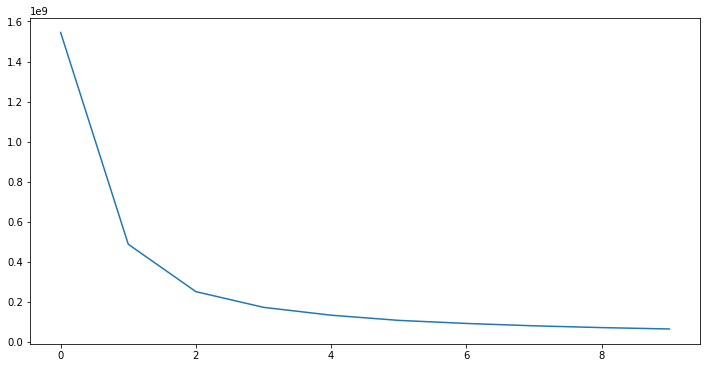

In [70]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(rfm_table.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia)

Ejecutamos la función Kmeans ya programa en python para obtener los clusters

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(rfm_table.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Creamos una variable con el valor del centro de los clusters

In [73]:
rfm_table['cluster'] = kmeans.labels_

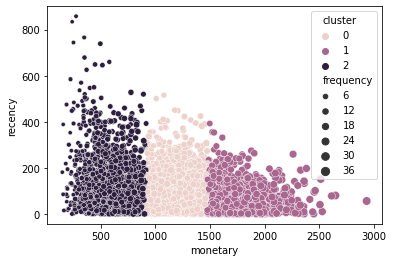

In [74]:
sns.scatterplot(data=rfm_table, x='monetary', y='recency', size='frequency', 
                hue='cluster')

En esta solución a pesar de elegir más variablesla más notoria es el monto de la transacción. La separaciones son similares a la solución 1 

In [75]:
rfm_table.cluster

customer_id
CS1112    0
CS1113    1
CS1114    0
CS1115    1
CS1116    2
         ..
CS8996    2
CS8997    2
CS8998    2
CS8999    2
CS9000    2
Name: cluster, Length: 6889, dtype: int32

#9.	Obtener monto promedio de transacción para cada uno de los grupos. 

El monto promedio para la solución 1

In [ ]:
df_Clientes.groupby('Grupo')['Monto_Total'].agg(Monto_promedio="mean")

,Monto_promedio
Grupo,
A,1490.000000
B,1672.428334
C,914.296809


El monto promedio para la solución 2

In [ ]:
rfm_table.groupby('cluster')['monetary'].agg(Monto_promedio="mean")

,Monto_promedio
cluster,
0,1226.144681
1,1722.950000
2,600.679751


#10.	¿Podríamos realizar algún tipo de pronóstico de monto de transacción con la información?

In [ ]:
#Graficamos los datos
df_T=df.groupby('trans_date')['tran_amount'].agg(Monto_total="sum")
df_T

,Monto_total
trans_date,
2011-05-16,5755
2011-05-17,5570
2011-05-18,5698
2011-05-19,5779
2011-05-20,6018
...,...
2015-03-12,5402
2015-03-13,5285
2015-03-14,4857


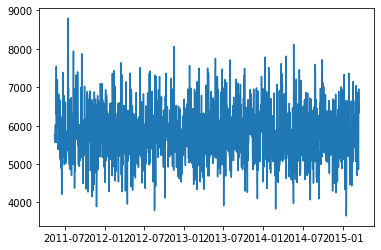

In [ ]:
plt.plot(df_T)

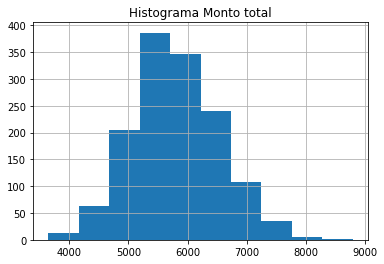

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.title('Histograma Monto total')
plt.hist(df_T.Monto_total)
plt.grid(True)
plt.show()
plt.clf()

Al graficar por fecha completa, los datos parecen ruido blanco y el ruido blanco no puede ser pronosticado por lo que revisamos solo a total mes- año 

In [5]:
df_ST=df.copy()

corto la fecha solo a mes-año y dejo el monto total por mes año

In [6]:
df_ST['trans_date']=pd.to_datetime(df_ST['trans_date']).dt.strftime('%Y-%m')
df_T=df_ST.groupby('trans_date')['tran_amount'].agg(Monto_total="sum")
df_T

,Monto_total
trans_date,
2011-05,98951
2011-06,174527
2011-07,178097
2011-08,188631
2011-09,169173
2011-10,182634
2011-11,166921
2011-12,181405
2012-01,177987


In [16]:
df_T.shape

(47, 1)

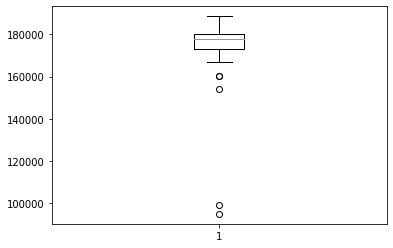

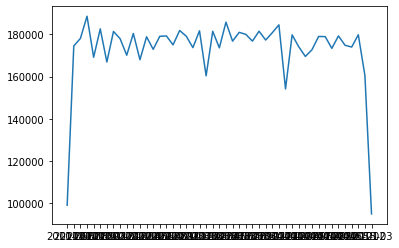

In [11]:
import matplotlib.pyplot as plt

#Visualición de datos
X=[df_T['Monto_total']]
plt.boxplot(X)
plt.show()

plt.plot(df_T)
plt.show()



Los datos se ven mucho mejor por lo que buscaremos hacer un pronostico a nivel mes

#Model Holt Winters

In [12]:
#Las librerias necesarias son las siguientes
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import DateFormatter
from matplotlib import dates as mpld


from statsmodels.tsa.seasonal import seasonal_decompose


from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Revisamos graficamente la tendencia, la estacionalidad y el residuo por metodo aditivo.
En ellas nos podemos percatar que sí tiene tendencia ascendente, y estacionalidad

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

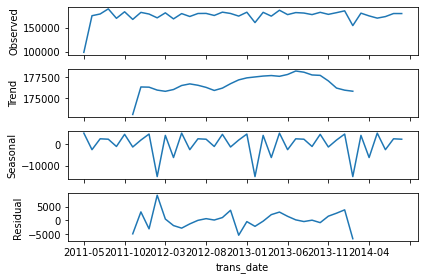

In [26]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Monto_total ,freq=12 ,model='additive').plot()
result = sm.tsa.stattools.adfuller(train.Monto_total , autolag='AIC')
plt.show()

Separaré los datos dejando algunos para revisar la acertividad del pronostico

In [14]:
train=df_T[0:40]
train.head()

,Monto_total
trans_date,
2011-05,98951
2011-06,174527
2011-07,178097
2011-08,188631
2011-09,169173


In [29]:
test=df_T[40:]
test.head()

,Monto_total
trans_date,
2014-09,173385
2014-10,179303
2014-11,174855
2014-12,174010
2015-01,179837


Ejecuto la función ya programada en Python para el método Holt Winter

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


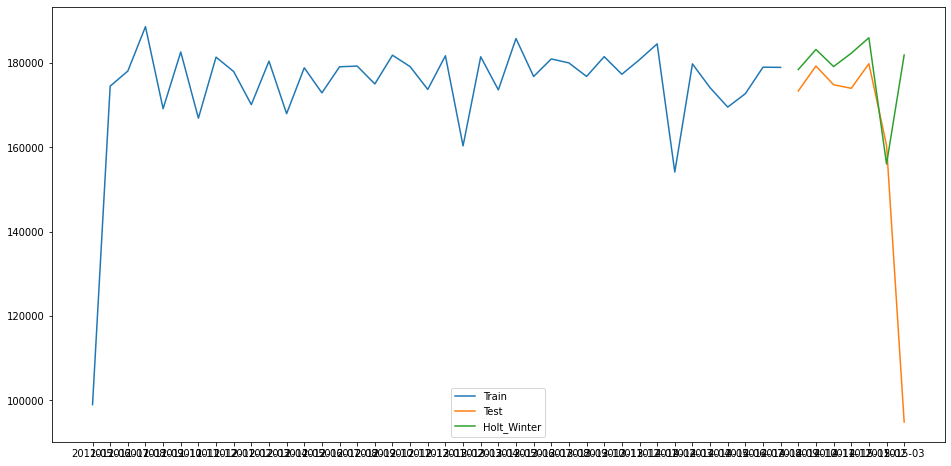

In [31]:
y_hat_avg = test.copy()
fit1= ExponentialSmoothing(np.asanyarray(train['Monto_total']), seasonal_periods=12, trend='add' ,seasonal='add').fit()
y_hat_avg['Monto_total'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Monto_total'], label='Train')
plt.plot(test['Monto_total'], label='Test')
plt.plot(y_hat_avg['Monto_total'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

En la grafica podemos ver de color verde el pronostico que nos da Holt Winter, el cual es similar a la linea naranja los datos reales

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Monto_total , y_hat_avg.Monto_total))
print(rms)

33315.51942000334


El error cuadratico medio de nuestros datos es de 33,315

Revisamos ahora con el metodo de Holt Winters lineal para ver si el error es menor

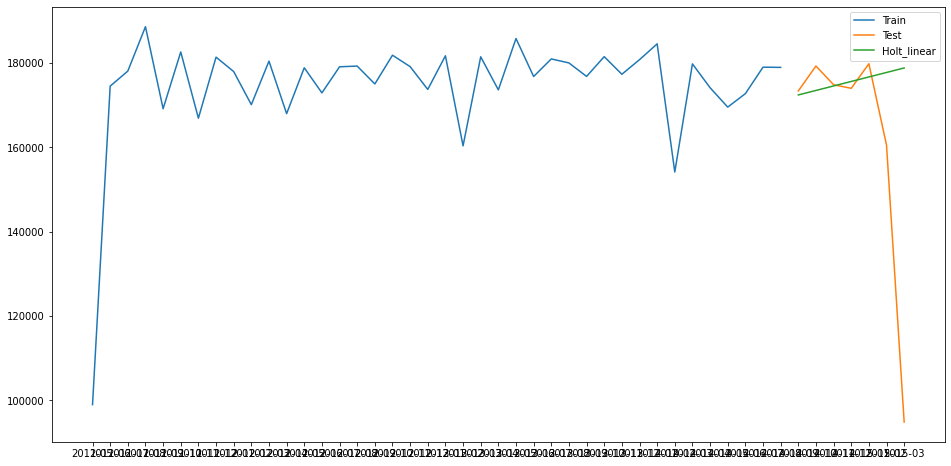

In [27]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Monto_total'])).fit(smoothing_level = 0.2,smoothing_slope = 0.5)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Monto_total'], label='Train')
plt.plot(test['Monto_total'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

El error cuadratico medio es similar por lo que podriamos usar cualquier metodo

In [32]:
rms = sqrt(mean_squared_error(test.Monto_total , y_hat_avg.Monto_total))
print(rms)

33315.51942000334
